In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Latex

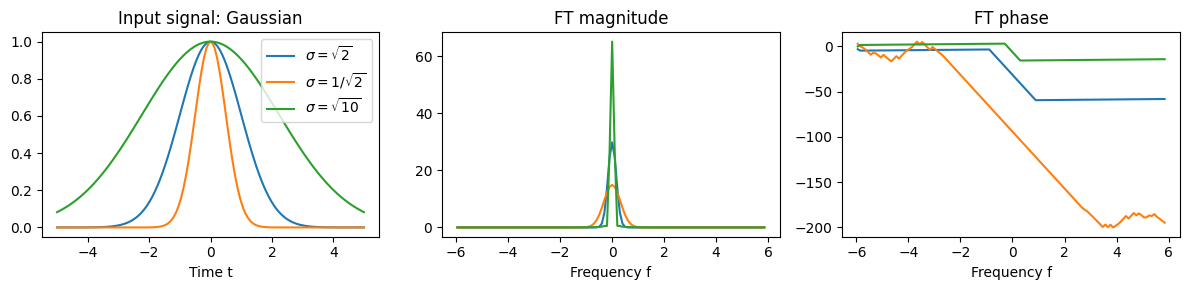

In [ ]:
#Regular Gaussian
def gaussian(x, r, b, A=1.0):
  return A*np.exp(-b*(x-r)**2)
N = 120
xmax = 5.0
fsamp = 12.0
xk= np.linspace(-xmax, xmax, N)
dt = xk[1]-xk[0]
freqs = np.fft.fftshift(np.fft.fftfreq(N, dt))
#freqs = np.fft.fftfreq(N, dt)
y1 = gaussian(xk, 0, 0.5)
y2 = gaussian(xk, 0, 2)
y3 = gaussian(xk, 0, 0.1)
ffy1 = np.fft.fftshift(np.fft.fft(y1))
#ffy1 = np.fft.fft(y1)
ffy2 = np.fft.fftshift(np.fft.fft(y2))
ffy3 = np.fft.fftshift(np.fft.fft(y3))
yfphase1 = np.unwrap(np.angle(ffy1))
yfphase2 = np.unwrap(np.angle(ffy2))
yfphase3 = np.unwrap(np.angle(ffy3))

fig, ax = plt.subplots(1, 3, figsize=(12, 3))
ax[0].plot(xk, y1, label=r"$\sigma = \sqrt{2}$")
ax[0].plot(xk, y2, label=r"$\sigma = 1/\sqrt{2}$")
ax[0].plot(xk, y3, label=r"$\sigma = \sqrt{10}$")
ax[1].plot(freqs, np.abs(ffy1))
ax[2].plot(freqs, yfphase1)
ax[1].plot(freqs, np.abs(ffy2))
ax[2].plot(freqs, yfphase2)
ax[1].plot(freqs, np.abs(ffy3))
ax[2].plot(freqs, yfphase3)
ax[0].set_title("Input signal: Gaussian")
ax[0].set_xlabel("Time t")
ax[1].set_title("FT magnitude")
ax[1].set_xlabel("Frequency f")
ax[2].set_title("FT phase")
ax[2].set_xlabel("Frequency f")
ax[0].legend()
fig.tight_layout()

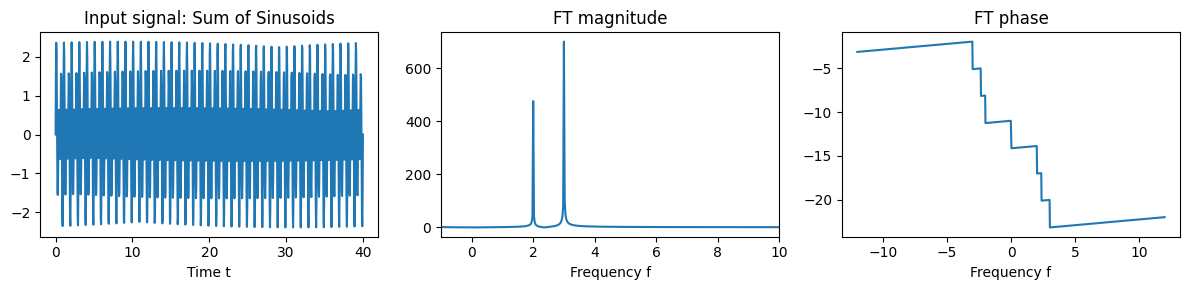

In [ ]:
#Sum of Sinusoids
def G(t, A, f):
  return A*np.sin(2.0*np.pi*f*t)

def sumofsines(t, a0, a1, f0, f1):
  return G(t, a0, f0) + G(t, a1, f1)

tmax = 40.0
a0 = 1.0
a1 = 1.5
a2 = 0.5
f0 = 2
f1 = 3
f2 = 5
tk = np.linspace(0.0, tmax, int(2.0*tmax*fsamp))
yk = sumofsines(tk, a0, a1, f0, f1)
freqs = np.fft.fftshift(np.fft.fftfreq(len(tk), tk[1]-tk[0]))
fourierf = np.fft.fftshift(np.fft.fft(yk))
ffphase = np.unwrap(np.angle(fourierf))
def plotter(tk, freqs, yk, ft, fp, ttl):
  fig, ax = plt.subplots(1, 3, figsize=(12, 3))
  ax[0].plot(tk, yk)
  ax[1].plot(freqs, np.abs(ft))
  ax[2].plot(freqs, fp)
  ax[0].set_title("Input signal: " + ttl)
  ax[0].set_xlabel("Time t")
  ax[1].set_title("FT magnitude")
  ax[1].set_xlabel("Frequency f")
  ax[1].set_xlim(-1, 10)
  ax[2].set_title("FT phase")
  ax[2].set_xlabel("Frequency f")
  fig.tight_layout()

plotter(tk, freqs, yk, fourierf, ffphase, "Sum of Sinusoids")


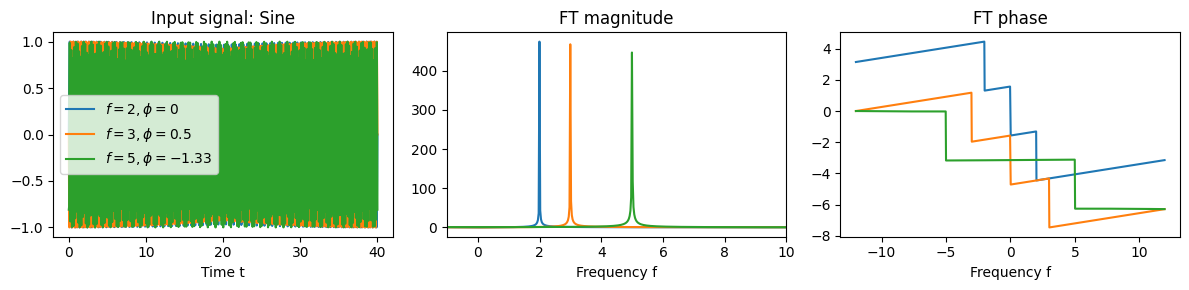

In [ ]:
def Gshift(t, A, f, theta):
  return A*np.sin(2.0*np.pi*f*(t-theta))

ys1 = Gshift(tk, a0, f0, 0)
ys2 = Gshift(tk, a0, f1, 0.5)
ys3 = Gshift(tk, a0, f2, -1.33)
ffys1 = np.fft.fftshift(np.fft.fft(ys1))
ffys2 = np.fft.fftshift(np.fft.fft(ys2))
ffys3 = np.fft.fftshift(np.fft.fft(ys3))
yfphases1 = np.unwrap(np.angle(ffys1))
yfphases2 = np.unwrap(np.angle(ffys2))
yfphases3 = np.unwrap(np.angle(ffys3))

fig, ax = plt.subplots(1, 3, figsize=(12, 3))
ax[0].plot(tk, ys1, label=r"$f=2,\phi=0$")
ax[0].plot(tk, ys2, label=r"$f=3,\phi=0.5$")
ax[0].plot(tk, ys3, label=r"$f=5,\phi=-1.33$")
ax[1].plot(freqs, np.abs(ffys1))
ax[2].plot(freqs, yfphases1)
ax[1].plot(freqs, np.abs(ffys2))
ax[2].plot(freqs, yfphases2)
ax[1].plot(freqs, np.abs(ffys3))
ax[2].plot(freqs, yfphases3)
ax[0].set_title("Input signal: Sine")
ax[0].set_xlabel("Time t")
ax[1].set_title("FT magnitude")
ax[1].set_xlabel("Frequency f")
ax[2].set_title("FT phase")
ax[2].set_xlabel("Frequency f")
ax[1].set_xlim(-1, 10)
ax[0].legend()
fig.tight_layout()

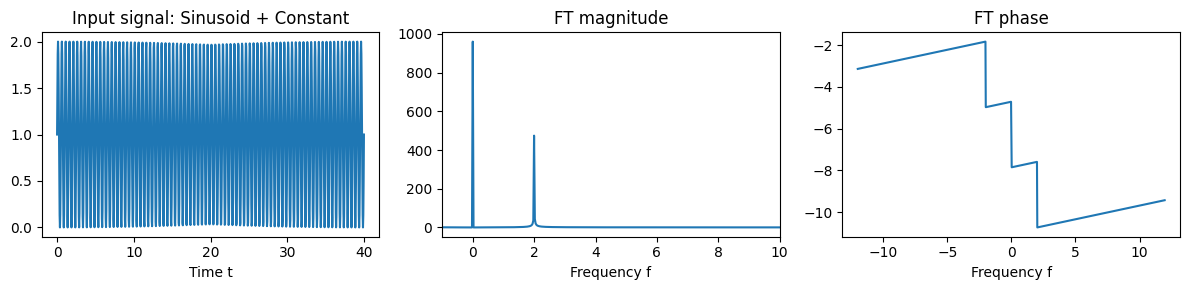

In [ ]:
#Sinusoid plus Constant
def sineconstant(t, A, f):
  return A + G(t, A, f)

yk2 = sineconstant(tk, a0, f0)
fourierf2 = np.fft.fftshift(np.fft.fft(yk2))
ffphase2 = np.unwrap(np.angle(fourierf2))
plotter(tk, freqs, yk2, fourierf2, ffphase2, "Sinusoid + Constant")

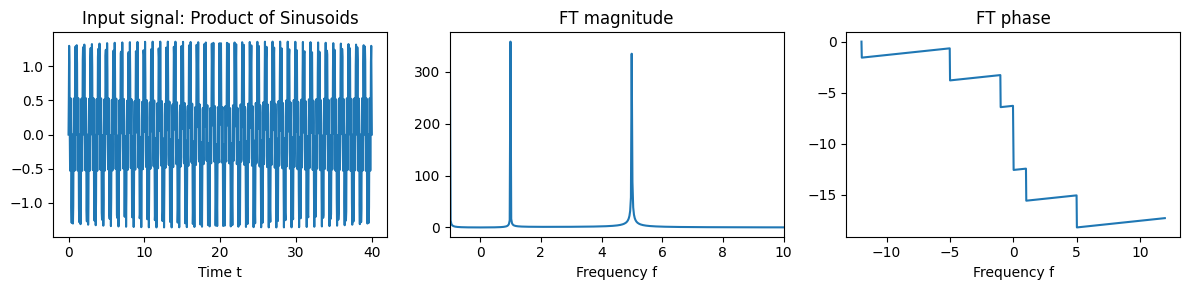

In [ ]:
#Product of Sinusoids
def sineproduct(t, a0, a1, f0, f1):
  return G(t, a0, f0)*G(t, a1, f1)

yk3 = sineproduct(tk, a0, a1, f0, f1)
fourierf3 = np.fft.fftshift(np.fft.fft(yk3))
ffphase3 = np.unwrap(np.angle(fourierf3))
plotter(tk, freqs, yk3, fourierf3, ffphase3, "Product of Sinusoids")

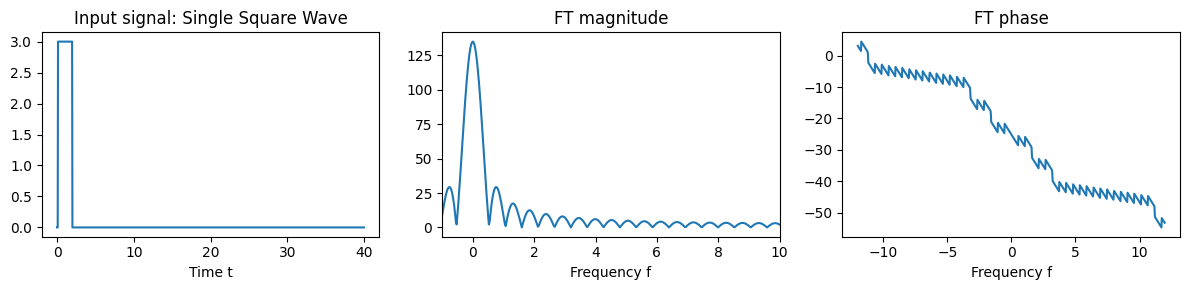

In [ ]:
#Single Square Wave
def singlesq(t, A):
  matrix = np.zeros(np.size(t))
  for n in range(len(t)):
    if 0.1 < t[n] <= 2:
        matrix[n] = A
  return matrix

ysq1 = singlesq(tk, 3)
fouriersq1 = np.fft.fftshift(np.fft.fft(ysq1))
ffsq1phase = np.unwrap(np.angle(fouriersq1))
plotter(tk, freqs, ysq1, fouriersq1, ffsq1phase, "Single Square Wave")


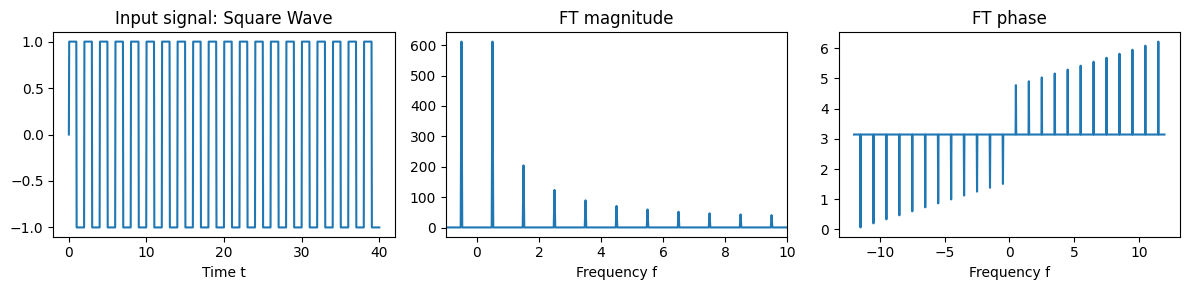

In [ ]:
#Periodic Square Wave
def squarewave(t, A, f):
  return A*np.sign(np.sin(2*np.pi*f*t))

ysq2 = squarewave(tk, a0, 0.5)
fouriersq2 = np.fft.fftshift(np.fft.fft(ysq2))
ffsq2phase = np.unwrap(np.angle(fouriersq2))
plotter(tk, freqs, ysq2, fouriersq2, ffsq2phase, "Square Wave")


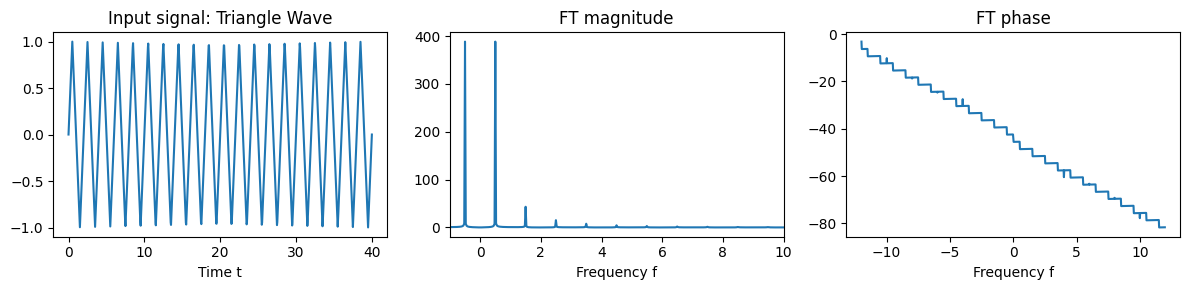

In [ ]:
#Regular Triangle Wave
def trianglewave(t, A, f):
  p = 1/f
  return (4*A/p)*np.abs(np.mod(t-p/4, p)-(p/2)) - A

ytr = trianglewave(tk, a0, 0.5)
fouriertr = np.fft.fftshift(np.fft.fft(ytr))
fftrphase = np.unwrap(np.angle(fouriertr))
plotter(tk, freqs, ytr, fouriertr, fftrphase, "Triangle Wave")

#Triangle looks more like a sine than a sawtooth,

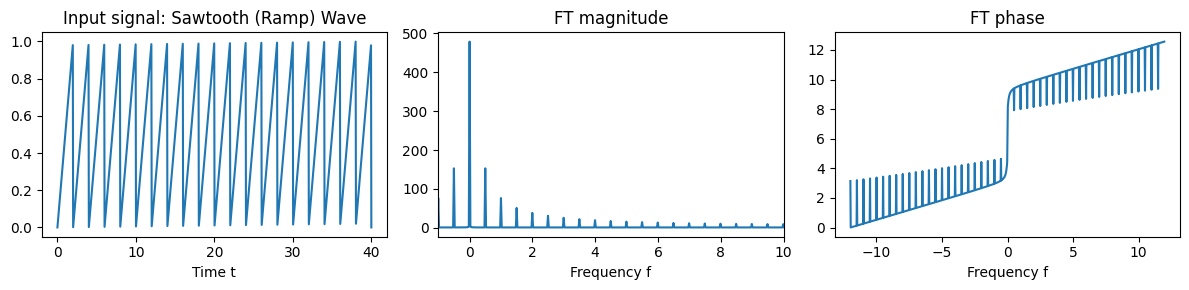

In [ ]:
#Ramp (Sawtooth)
def sawtooth(t, A, f):
  return A*np.mod(f*t, 1)

ysw = sawtooth(tk, a0, 0.5)
fouriersw = np.fft.fftshift(np.fft.fft(ysw))
ffswphase = np.unwrap(np.angle(fouriersw))
plotter(tk, freqs, ysw, fouriersw, ffswphase, "Sawtooth (Ramp) Wave")


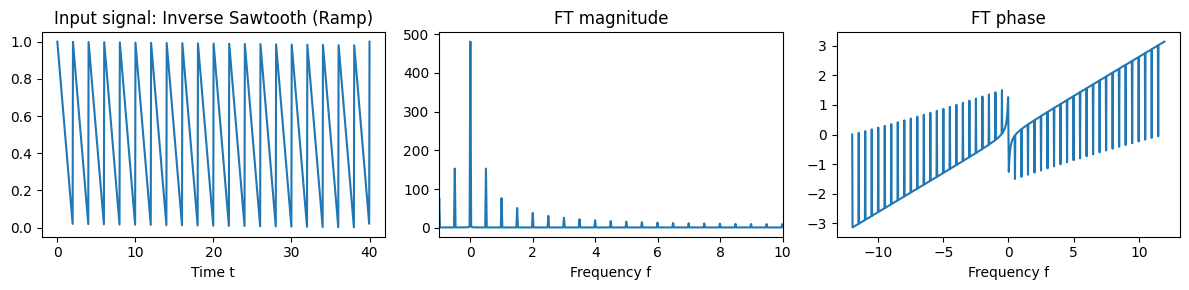

In [ ]:
#Inverse Ramp
ysw1 = 1-sawtooth(tk, a0, 0.5)
fouriersw1 = np.fft.fftshift(np.fft.fft(ysw1))
ffswphase1 = np.unwrap(np.angle(fouriersw1))
plotter(tk, freqs, ysw1, fouriersw1, ffswphase1, "Inverse Sawtooth (Ramp)")

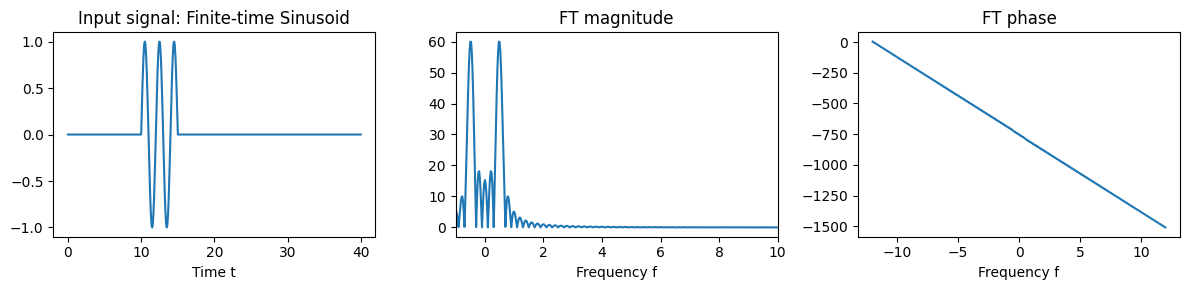

In [ ]:
#Finite-time Sinusoid
def finitesine(t, A, f):
  step = np.zeros(len(t))
  for n in range(len(t)):
    if 10 < t[n] < 15:
      step[n] = 1
  return G(t, A, f)*step

yfs = finitesine(tk, a0, 0.5)
fourierfs = np.fft.fftshift(np.fft.fft(yfs))
fffsphase = np.unwrap(np.angle(fourierfs))
plotter(tk, freqs, yfs, fourierfs, fffsphase, "Finite-time Sinusoid")

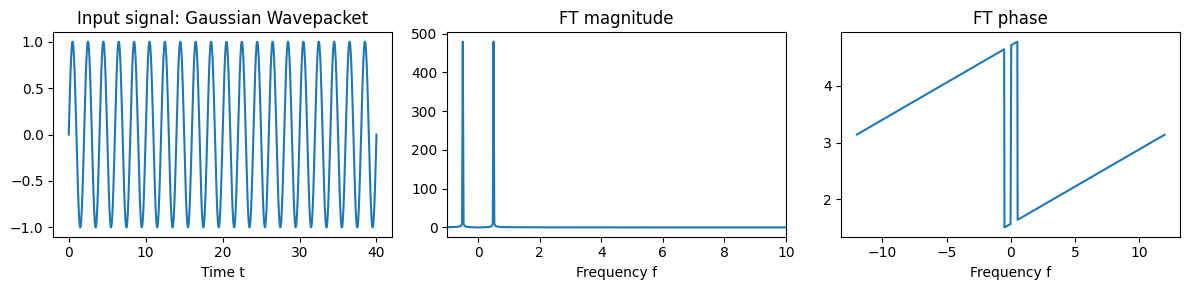

In [ ]:
def wavepacket(t, A, f):
  return gaussian(t, 0, 0)*G(t, A, f)

yw = wavepacket(tk, a0, 0.5)
fourierw = np.fft.fftshift(np.fft.fft(yw))
ffwphase = np.unwrap(np.angle(fourierw))
plotter(tk, freqs, yw, fourierw, ffwphase, "Gaussian Wavepacket")